In [4]:
#importing the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [7]:
#Loading the MNIST Dataset

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [8]:
#Reshaping the data

X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_test = X_test.reshape(X_test.shape[0], 28,28,1)

In [9]:
#Standardizing the data
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [10]:
#One hot encoding the data
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [13]:
#Building the model

model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32,(4,4), activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [14]:
#Getting the model summary

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 10, 10, 32)          │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 3, 3, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,042 (156.41 KB)

 Trainable params: 40,042 (156.41 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
#Compiling the model

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
#Fitting the model

history = model.fit(X_train, y_train, epochs = 10, validation_split = 0.2, batch_size = 64)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6965 - loss: 0.9166 - val_accuracy: 0.9682 - val_loss: 0.1100
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9511 - loss: 0.1759 - val_accuracy: 0.9782 - val_loss: 0.0756
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9643 - loss: 0.1201 - val_accuracy: 0.9833 - val_loss: 0.0605
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9729 - loss: 0.0979 - val_accuracy: 0.9833 - val_loss: 0.0584
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9765 - loss: 0.0833 - val_accuracy: 0.9858 - val_loss: 0.0521
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9810 - loss: 0.0655 - val_accuracy: 0.9858 - val_loss: 0.0522
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9829 - loss: 0.0581 - val_accuracy: 0.9861 - val_loss: 0.0532
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9866 - loss: 0.0479 - val_accuracy: 0.

In [31]:
#Model evaluation

loss, accuracy = model.evaluate(X_test, y_test)

display('Loss', loss)
display('Accuracy', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9867 - loss: 0.0480


'Loss'

0.03926912322640419

'Accuracy'

0.9894999861717224

In [21]:
 #making predictions

pred = model.predict(X_test, batch_size = 32)
pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[1.7982764e-10, 3.2032579e-09, 9.5452343e-08, ..., 9.9999976e-01,
        4.4145109e-12, 8.6139153e-08],
       [1.9192848e-06, 5.4057290e-07, 9.9999714e-01, ..., 1.8295037e-08,
        1.2320393e-07, 2.5788878e-11],
       [9.4719794e-13, 1.0000000e+00, 4.5097662e-10, ..., 2.2457238e-09,
        2.8820366e-10, 6.7519905e-12],
       ...,
       [1.2683838e-15, 2.5415027e-13, 1.7200183e-16, ..., 3.0435288e-12,
        4.9341579e-11, 2.8097127e-09],
       [1.1715263e-08, 1.4275622e-11, 5.0643094e-13, ..., 2.0055479e-14,
        2.2217324e-07, 6.9630119e-08],
       [2.6939075e-09, 1.1135489e-14, 8.4127659e-13, ..., 1.6823890e-21,
        1.7232846e-10, 9.3375116e-14]], dtype=float32)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


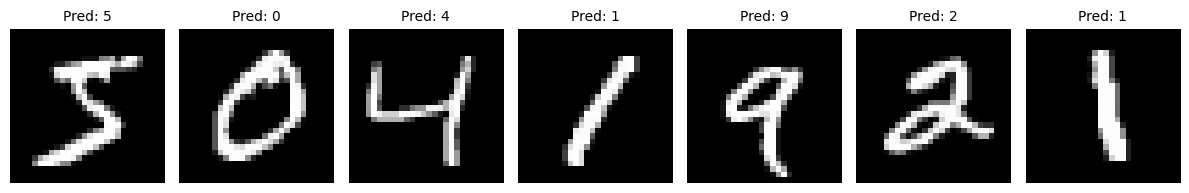

In [28]:
#Visualizing the train data and its prediction

pred_train = model.predict(X_train)

plt.figure(figsize=(12, 6))
for i in range(7):
    plt.subplot(1, 7, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    predicted_label = labels[np.argmax(pred_train[i])]
    plt.title(f"Pred: {predicted_label}", fontsize=10)

plt.tight_layout()
plt.show()

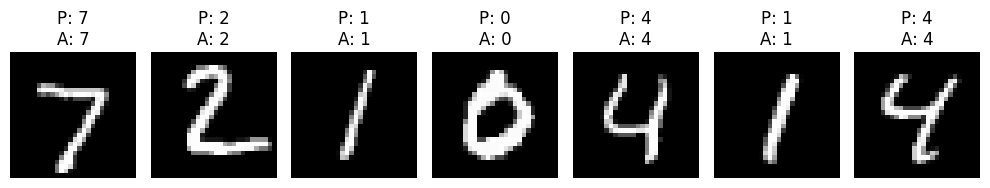

In [23]:
# Visualizing the test images with their predictions

plt.figure(figsize=(10,9))
for i in range(7):
    plt.subplot(1, 7, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    predicted_label = labels[np.argmax(pred[i])]
    actual_label = labels[np.argmax(y_test[i])]
    plt.title(f"P: {predicted_label}\nA: {actual_label}")

plt.tight_layout()
plt.show()

In [30]:
#Saving the model

model.save('MNIST.keras')
print("The model has been saved successfully")

The model has been saved successfully
